## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `6_svd` 
### Standardized Depth Value (SDV) Calculations and Analysis 

Notebook contents 
* SDV calculations and analysis 

created by Cassie Lumbrazo\
last updated: June 2024\
run location: locally\
python environment: **raster**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# import csv 
# import copy 
# import os.path 

import geopandas as gpd
# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [18]:
# define path to save the figures to
figure_path = "C:\\Users\\Lumbr\\OneDrive - UW\\Documents - mountainhydro\\People\\CassieLumbrazo\\EasternCascades\\Writing\\5_Manuscript\\2_PostDefense\\python_figures\\"

In [3]:
# Paths for local machine
ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
ds

<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

Define Constants

In [5]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

## Calculate SDV 
Using previous code locally, from this file: https://github.com/cassielumbrazo/RAPID_raster_analysis/blob/main/6_rapid_compare_canopy_v3.ipynb

In [6]:
# Per Justin's suggestion (thanks Justin) we should remove snow depths = 0
ds['hs_rapid_nozeros'] = ds['hs_rapid'].where(ds['hs_rapid']!=0)
ds['hs_ncalm_nozeros'] = ds['hs_ncalm'].where(ds['hs_ncalm']!=0)

# # SVD = (measured snow depth at a point - the mean depth for the survey) / the standard deviation of the survey
ds['sdv_rapid'] = (ds['hs_rapid'] - ds['hs_rapid'].mean(dim=['x','y'])) / ds['hs_rapid'].std(dim=['x','y'])
ds['sdv_ncalm'] = (ds['hs_ncalm'] - ds['hs_ncalm'].mean(dim=['x','y'])) / ds['hs_ncalm'].std(dim=['x','y'])

ds['diff_sdv_rapid_ncalm'] = (ds['sdv_rapid'] - ds['sdv_ncalm'])

# We want to calculate SVD only using zero values 
# SVD = (measured snow depth at a point - the mean depth for the survey) / the standard deviation of the survey
ds['sdv_rapid_nozeros'] = (ds['hs_rapid_nozeros'] - ds['hs_rapid_nozeros'].mean(dim=['x','y'])) / ds['hs_rapid_nozeros'].std(dim=['x','y'])
ds['sdv_ncalm_nozeros'] = (ds['hs_ncalm_nozeros'] - ds['hs_ncalm_nozeros'].mean(dim=['x','y'])) / ds['hs_ncalm_nozeros'].std(dim=['x','y'])

ds['diff_sdv_rapid_ncalm_nozeros'] = (ds['sdv_rapid_nozeros'] - ds['sdv_ncalm_nozeros'])

Take a look at SDV values... 

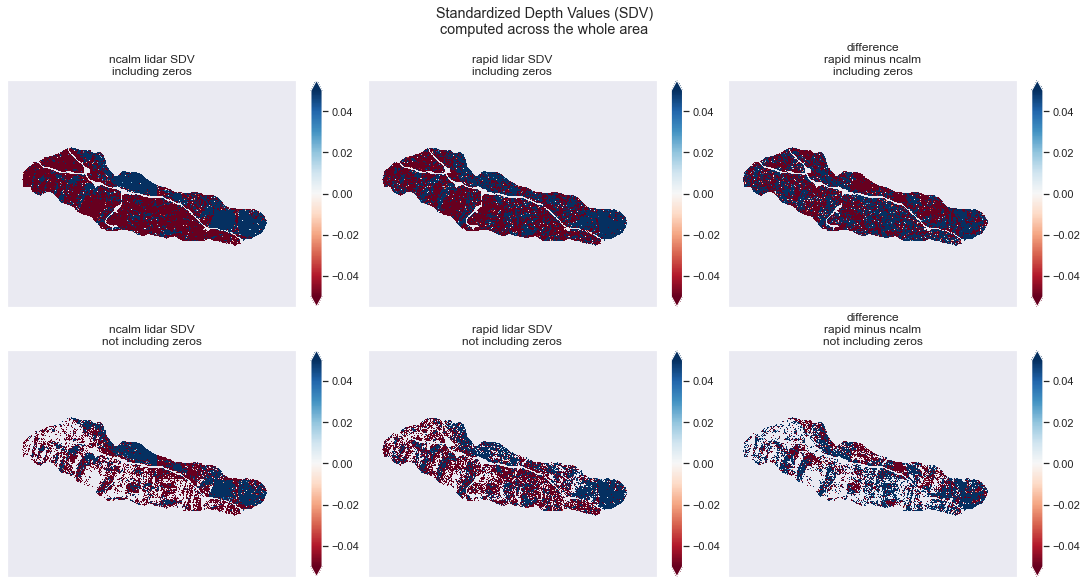

In [7]:
# plot SDV maps for ncalm and rapid and difference in SDV
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,8), constrained_layout = True)
ds['sdv_ncalm'].plot(ax=axes[0,0], cmap='RdBu', vmin=-0, vmax=0, cbar_kwargs={'label': ''})
ds['sdv_rapid'].plot(ax=axes[0,1], cmap='RdBu', vmin=-0, vmax=0, cbar_kwargs={'label': ''})
ds['diff_sdv_rapid_ncalm'].plot(ax=axes[0,2], cmap='RdBu', vmin=-0, vmax=0, cbar_kwargs={'label': ''})

ds['sdv_ncalm_nozeros'].plot(ax=axes[1,0], cmap='RdBu', vmin=-0, vmax=0, cbar_kwargs={'label': ''})
ds['sdv_rapid_nozeros'].plot(ax=axes[1,1], cmap='RdBu', vmin=-0, vmax=0, cbar_kwargs={'label': ''})
ds['diff_sdv_rapid_ncalm_nozeros'].plot(ax=axes[1,2], cmap='RdBu', vmin=-0, vmax=0, cbar_kwargs={'label': ''})

plt.suptitle('Standardized Depth Values (SDV)\ncomputed across the whole area')
axes[0,0].set_title('ncalm lidar SDV\nincluding zeros')
axes[0,1].set_title('rapid lidar SDV\nincluding zeros')
axes[0,2].set_title('difference\nrapid minus ncalm\nincluding zeros')

axes[1,0].set_title('ncalm lidar SDV\nnot including zeros')
axes[1,1].set_title('rapid lidar SDV\nnot including zeros')
axes[1,2].set_title('difference\nrapid minus ncalm\nnot including zeros')

axes[0,0].set_xlabel('');axes[0,0].set_ylabel('');axes[0,0].set_xticks([]);axes[0,0].set_yticks([])
axes[0,1].set_xlabel('');axes[0,1].set_ylabel('');axes[0,1].set_xticks([]);axes[0,1].set_yticks([])
axes[0,2].set_xlabel('');axes[0,2].set_ylabel('');axes[0,2].set_xticks([]);axes[0,2].set_yticks([])

axes[1,0].set_xlabel('');axes[1,0].set_ylabel('');axes[1,0].set_xticks([]);axes[1,0].set_yticks([])
axes[1,1].set_xlabel('');axes[1,1].set_ylabel('');axes[1,1].set_xticks([]);axes[1,1].set_yticks([])
axes[1,2].set_xlabel('');axes[1,2].set_ylabel('');axes[1,2].set_xticks([]);axes[1,2].set_yticks([])

plt.show()

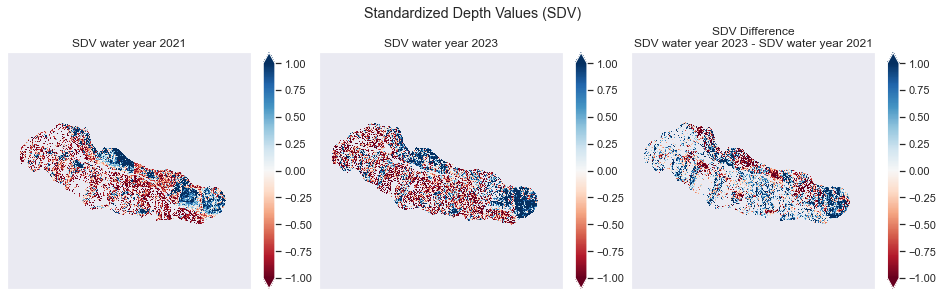

In [37]:
# plot SDV maps for ncalm and rapid and difference in SDV
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(13,4), constrained_layout = True)

ds['sdv_ncalm_nozeros'].plot(ax=axes[0], cmap='RdBu', vmin=-1, vmax=1, cbar_kwargs={'label': ''})
ds['sdv_rapid_nozeros'].plot(ax=axes[1], cmap='RdBu', vmin=-1, vmax=1, cbar_kwargs={'label': ''})
ds['diff_sdv_rapid_ncalm_nozeros'].plot(ax=axes[2], cmap='RdBu', vmin=-1, vmax=1, cbar_kwargs={'label': ''})

plt.suptitle('Standardized Depth Values (SDV)')

axes[0].set_title('SDV water year 2021')
axes[1].set_title('SDV water year 2023')
axes[2].set_title('SDV Difference\nSDV water year 2023 - SDV water year 2021')

axes[0].set_xlabel('');axes[0].set_ylabel('');axes[0].set_xticks([]);axes[0].set_yticks([])
axes[1].set_xlabel('');axes[1].set_ylabel('');axes[1].set_xticks([]);axes[1].set_yticks([])
axes[2].set_xlabel('');axes[2].set_ylabel('');axes[2].set_xticks([]);axes[2].set_yticks([])


plt.show()

And the histogram with median values, 

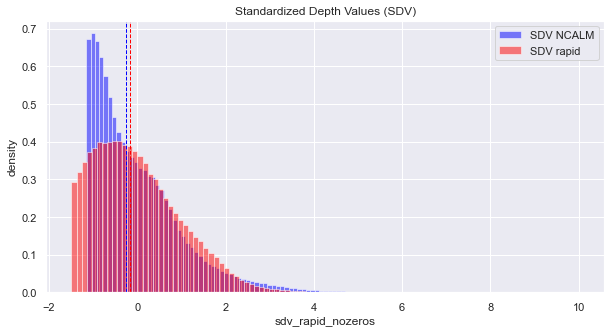

In [8]:
fig = plt.figure(figsize=(10,5))
ds['sdv_ncalm_nozeros'].plot.hist(bins=100, alpha=0.5, density=True, label='SDV NCALM', color='blue');
ds['sdv_rapid_nozeros'].plot.hist(bins=100, alpha=0.5, density=True, label='SDV rapid', color='red');

# plot the median line 
plt.axvline(ds['sdv_ncalm_nozeros'].median(), color='blue', linestyle='dashed', linewidth=1, label='');
plt.axvline(ds['sdv_rapid_nozeros'].median(), color='red', linestyle='dashed', linewidth=1, label='');

# plt.axvline(0,c='k')

# constants
# plt.legend(loc=(1.02,.5));
plt.legend()

# plt.xlim(-4,4);
plt.ylabel('density')
plt.title('Standardized Depth Values (SDV)')
plt.show()

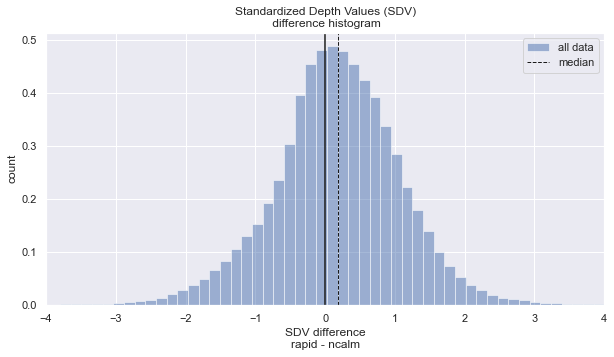

In [9]:
fig = plt.figure(figsize=(10,5))
ds['diff_sdv_rapid_ncalm_nozeros'].plot.hist(bins=100, alpha=0.5, density=True, label='all data');
# plot the median line 
plt.axvline(ds['diff_sdv_rapid_ncalm_nozeros'].median(), color='k', linestyle='dashed', linewidth=1, label='median');
plt.axvline(0,c='k')

# constants
# plt.legend(loc=(1.02,.5));
plt.legend()

plt.xlim(-4,4);
plt.ylabel('count')
plt.xlabel('SDV difference\nrapid - ncalm')

plt.title('Standardized Depth Values (SDV)\n difference histogram')
plt.show()

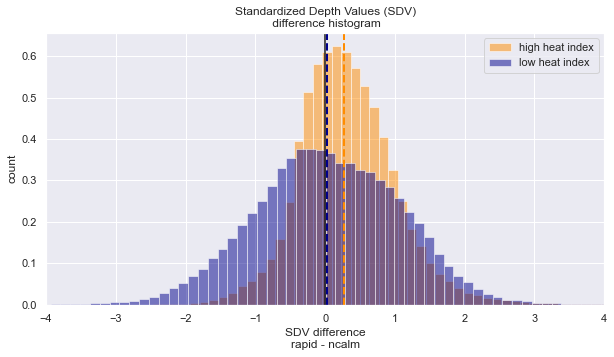

In [10]:
fig = plt.figure(figsize=(10,5))
ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['dah_binary'] ==  1).plot.hist(bins=100, color=colorsouth, alpha=0.5, density=True, label='high heat index');
ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['dah_binary'] == -1).plot.hist(bins=100, color=colornorth, alpha=0.5, density=True, label='low heat index');

# plot the median line 
plt.axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['dah_binary'] ==  1).median(), color=colorsouth, linestyle='dashed', linewidth=2, label='');
plt.axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['dah_binary'] == -1).median(), color=colornorth, linestyle='dashed', linewidth=2, label='');
plt.axvline(0,c='k')

# constants
# plt.legend(loc=(1.02,.5));
plt.legend()

plt.xlim(-4,4);
plt.ylabel('count')
plt.xlabel('SDV difference\nrapid - ncalm')

plt.title('Standardized Depth Values (SDV)\n difference histogram')
plt.show()

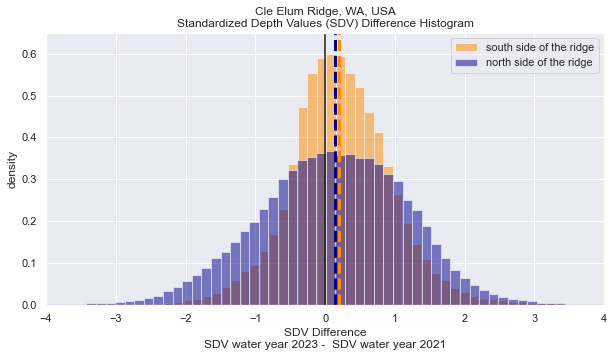

In [38]:
fig = plt.figure(figsize=(10,5))
ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] ==  1).plot.hist(bins=100, color=colorsouth, alpha=0.5, density=True, label='south side of the ridge');
ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] == -1).plot.hist(bins=100, color=colornorth, alpha=0.5, density=True, label='north side of the ridge');

# plot the median line 
plt.axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] ==  1).median(), color=colorsouth, linestyle='dashed', linewidth=3, label='');
plt.axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] == -1).median(), color=colornorth, linestyle='dashed', linewidth=3, label='');
plt.axvline(0,c='k')

# constants
# plt.legend(loc=(1.02,.5));
plt.legend()

plt.xlim(-4,4);
plt.ylim(0,0.65)
plt.ylabel('density')
plt.xlabel('SDV Difference\nSDV water year 2023 -  SDV water year 2021')

plt.title('Cle Elum Ridge, WA, USA\nStandardized Depth Values (SDV) Difference Histogram')

# export the figure with high resolution
figure_name = 'diff_SDV_side_of_ridge.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

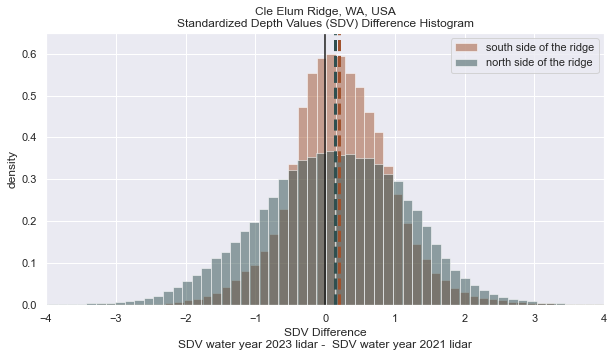

In [12]:
fig = plt.figure(figsize=(10,5))
ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] ==  1).plot.hist(bins=100, color='sienna', alpha=0.5, density=True, label='south side of the ridge');
ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] == -1).plot.hist(bins=100, color='darkslategrey', alpha=0.5, density=True, label='north side of the ridge');

# plot the median line 
plt.axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] ==  1).median(), color='sienna', linestyle='dashed', linewidth=3, label='');
plt.axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] == -1).median(), color='darkslategrey', linestyle='dashed', linewidth=3, label='');
plt.axvline(0,c='k')

# constants
# plt.legend(loc=(1.02,.5));
plt.legend()

plt.xlim(-4,4);
plt.ylim(0,0.65)
plt.ylabel('density')
plt.xlabel('SDV Difference\nSDV water year 2023 lidar -  SDV water year 2021 lidar')

plt.title('Cle Elum Ridge, WA, USA\nStandardized Depth Values (SDV) Difference Histogram')
plt.show()

In [13]:
# print the median for the diff_sdv on the north and south sides of the ridge 
print('median SDV difference on the south side of the ridge: ', ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] ==  1).median().values)
print('median SDV difference on the north side of the ridge: ', ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['baf_ridge'] == -1).median().values)

median SDV difference on the south side of the ridge:  0.20474860072135925
median SDV difference on the north side of the ridge:  0.1382196843624115


Just curious, take a look at the CDFs

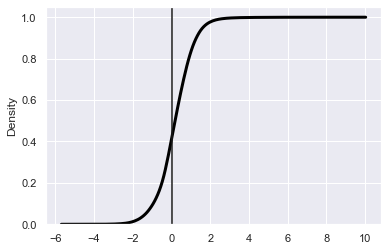

In [14]:
sns.kdeplot(ds['diff_sdv_rapid_ncalm_nozeros'].values.flatten(), color='black', label='BAF 100', cumulative=True, linewidth=3)
plt.axvline(0,c='k')

plt.show()

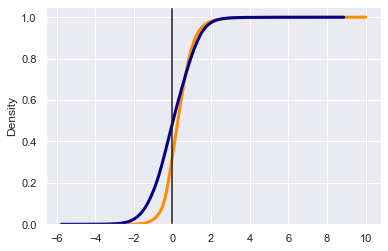

In [15]:
sns.kdeplot((ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['dah_binary'] ==  1)).values.flatten(), color=colorsouth, label='high heat index', cumulative=True, linewidth=3)
sns.kdeplot((ds['diff_sdv_rapid_ncalm_nozeros'].where(ds['dah_binary'] == -1)).values.flatten(), color=colornorth, label='low  heat index', cumulative=True, linewidth=3)

plt.axvline(0,c='k')

plt.show()

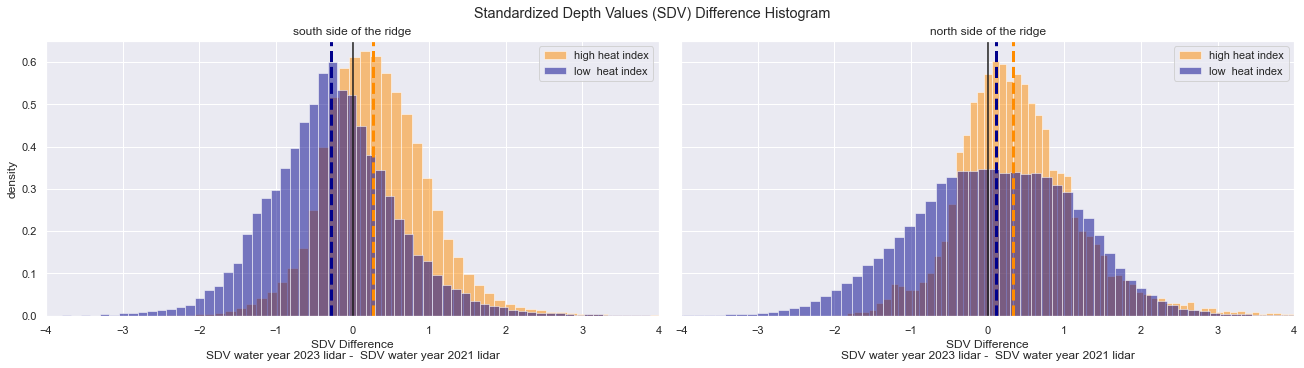

In [16]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18,5), constrained_layout = True)
ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] ==  1)).plot.hist(ax=axes[0], bins=100, color=colorsouth, alpha=0.5, density=True, label='high heat index');
ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] == -1)).plot.hist(ax=axes[0], bins=100, color=colornorth, alpha=0.5, density=True, label='low  heat index');
ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1) & (ds['dah_binary'] ==  1)).plot.hist(ax=axes[1], bins=100, color=colorsouth, alpha=0.5, density=True, label='high heat index');
ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1) & (ds['dah_binary'] == -1)).plot.hist(ax=axes[1], bins=100, color=colornorth, alpha=0.5, density=True, label='low  heat index');

# plot the median line 
axes[0].axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] ==  1)).median(), color=colorsouth, linestyle='dashed', linewidth=3, label='');
axes[0].axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] == -1)).median(), color=colornorth, linestyle='dashed', linewidth=3, label='');
axes[1].axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1) & (ds['dah_binary'] ==  1)).median(), color=colorsouth, linestyle='dashed', linewidth=3, label='');
axes[1].axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1) & (ds['dah_binary'] == -1)).median(), color=colornorth, linestyle='dashed', linewidth=3, label='');

axes[0].axvline(0,c='k');axes[1].axvline(0,c='k')

# constants
# axes[0].legend(loc=(1.02,.5));
axes[0].legend()
axes[1].legend()

axes[0].set_ylim(0,0.65);
axes[0].set_xlim(-4,4);
axes[0].set_ylabel('density')
axes[0].set_xlabel('SDV Difference\nSDV water year 2023 lidar -  SDV water year 2021 lidar')
axes[1].set_xlabel('SDV Difference\nSDV water year 2023 lidar -  SDV water year 2021 lidar')

plt.suptitle('Standardized Depth Values (SDV) Difference Histogram')
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

plt.show()

In [17]:
# print the median for the diff_sdv on the north and south sides of the ridge 
print('median SDV difference on the south side of the ridge, high heat index: ', ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] ==  1)).median().values)
print('median SDV difference on the south side of the ridge, low heat index: ', ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] ==  -1)).median().values)

print('median SDV difference on the north side of the ridge, high heat index: ', ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1)  & (ds['dah_binary'] ==  1)).median().values)
print('median SDV difference on the north side of the ridge, low heat index: ', ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1)  & (ds['dah_binary'] ==  -1)).median().values)

median SDV difference on the south side of the ridge, high heat index:  0.2695114016532898
median SDV difference on the south side of the ridge, low heat index:  -0.2772511839866638
median SDV difference on the north side of the ridge, high heat index:  0.33271533250808716
median SDV difference on the north side of the ridge, low heat index:  0.10708746314048767


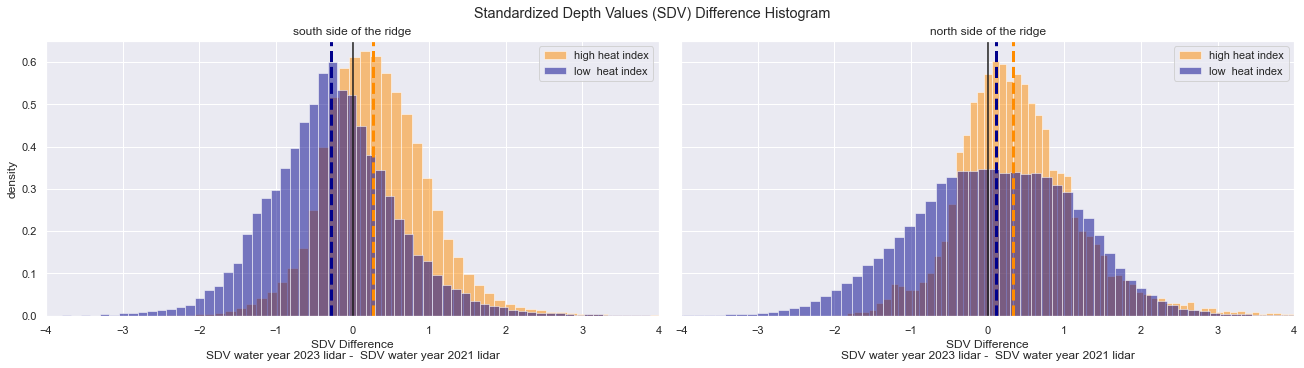

In [18]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18,5), constrained_layout = True)
ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] ==  1)).plot.hist(ax=axes[0], bins=100, color=colorsouth, alpha=0.5, density=True, label='high heat index');
ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] == -1)).plot.hist(ax=axes[0], bins=100, color=colornorth, alpha=0.5, density=True, label='low  heat index');
ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1) & (ds['dah_binary'] ==  1)).plot.hist(ax=axes[1], bins=100, color=colorsouth, alpha=0.5, density=True, label='high heat index');
ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1) & (ds['dah_binary'] == -1)).plot.hist(ax=axes[1], bins=100, color=colornorth, alpha=0.5, density=True, label='low  heat index');

# plot the median line 
axes[0].axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] ==  1)).median(), color=colorsouth, linestyle='dashed', linewidth=3, label='');
axes[0].axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  1)  & (ds['dah_binary'] == -1)).median(), color=colornorth, linestyle='dashed', linewidth=3, label='');
axes[1].axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1) & (ds['dah_binary'] ==  1)).median(), color=colorsouth, linestyle='dashed', linewidth=3, label='');
axes[1].axvline(ds['diff_sdv_rapid_ncalm_nozeros'].where((ds['baf_ridge'] ==  -1) & (ds['dah_binary'] == -1)).median(), color=colornorth, linestyle='dashed', linewidth=3, label='');

axes[0].axvline(0,c='k');axes[1].axvline(0,c='k')

# constants
# axes[0].legend(loc=(1.02,.5));
axes[0].legend()
axes[1].legend()

axes[0].set_ylim(0,0.65);
axes[0].set_xlim(-4,4);
axes[0].set_ylabel('density')
axes[0].set_xlabel('SDV Difference\nSDV water year 2023 lidar -  SDV water year 2021 lidar')
axes[1].set_xlabel('SDV Difference\nSDV water year 2023 lidar -  SDV water year 2021 lidar')

plt.suptitle('Standardized Depth Values (SDV) Difference Histogram')
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

plt.show()